In [1]:
from intcode import Intcode
from collections import deque, defaultdict

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Robot():
    def __init__(self, instructions, panels, input, output):
        self.position = 0
        self.facing = 1j
        self.input = input
        self.output = output
        self.controller = Intcode(instructions, input, output)
        self.panels = panels
    
    def turn(self, dir):
        if dir == 0:
            self.facing *= 1j
        else:
            self.facing /= 1j
    
    def forward(self):
        self.position += self.facing
    
    def read(self):
        self.input.appendleft(self.panels[self.position])
    
    def paint(self, color):
        self.panels[self.position] = color
    
    def step(self):
        self.read()
        while len(self.output) < 2:
            self.controller.fetch_exec()
            if self.controller.halted:
                return False

        color = self.output.popleft()
        self.paint(color)

        dir = self.output.popleft()
        self.turn(dir)
        self.forward()
        return True
    
    def run(self):
        running = True
        while running:
            running = self.step()


In [3]:
with open('input11.txt') as f:
    instructions = [int(n) for n in f.read().split(',')]

In [4]:
panels = defaultdict(int)

Robot(instructions, panels, input=deque(), output=deque()).run()

print(len(panels))

2441


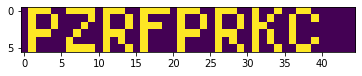

In [5]:
panels = defaultdict(int)
panels[0] = 1

Robot(instructions, panels, input=deque(), output=deque()).run()

im = np.zeros((6, 45))
for coords, color in panels.items():
    y = int(coords.real)
    x = -int(coords.imag)
    im[x, y] = color

plt.imshow(im)